Coursera Google Advanced Data Analytics

Course 5 Regression Analysis Simplify Complex Data Relationships

Module 3 Multiple linear regression

Interpret multiple regression results with Python

 See if it is possibele that learn more about the penguins body mass.

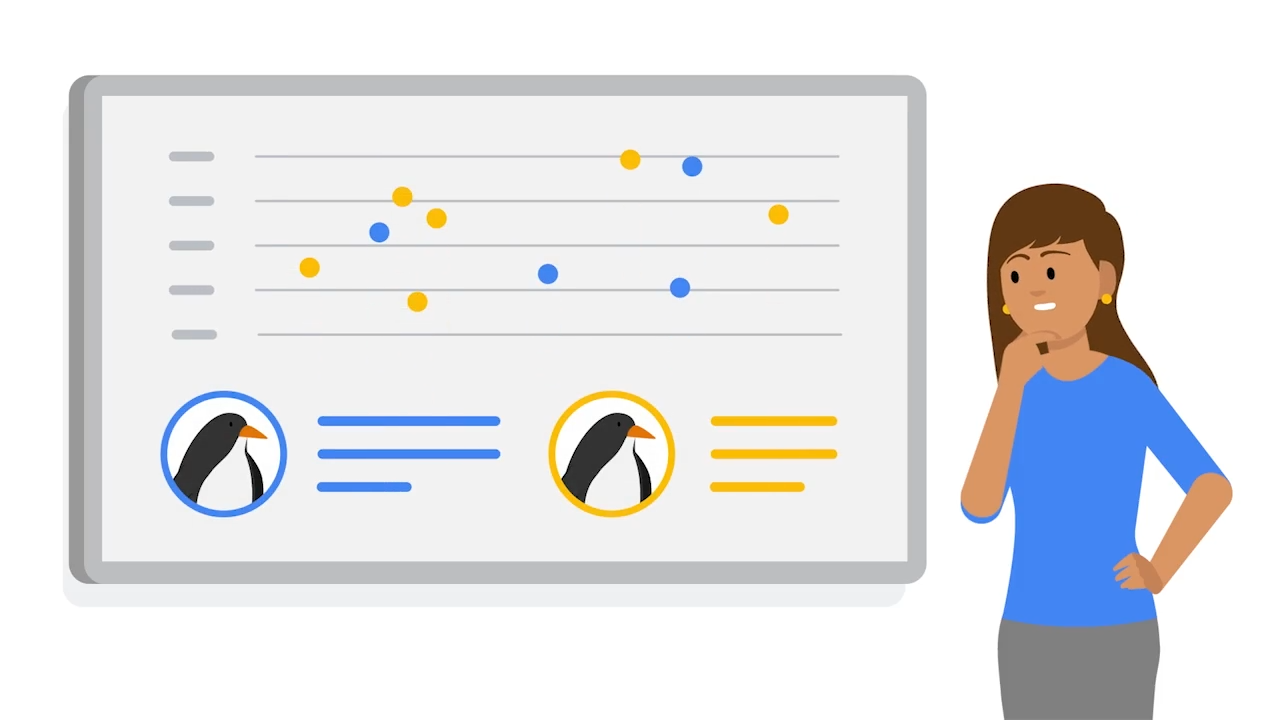

Image from Google Advanced Data Anlytics

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [27]:
# Load dataset
penguins = sns.load_dataset("penguins")

In [28]:
# Select relevant columns and clean data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]
penguins = penguins.dropna()

In [29]:
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
4,3450.0,36.7,Female,Adelie
5,3650.0,39.3,Male,Adelie


In [30]:
# Ensure proper categorical data
penguins["gender"] = penguins["gender"].astype("category")
penguins["species"] = penguins["species"].astype("category")

In [31]:
# Split data into features and target
penguins_x = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [32]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(penguins_x, penguins_y, test_size=0.3, random_state=42)

Note that the test size variable is the proportion of data which randomly assigning to the holdout dataset. In this case this is holding back 30% of the data to test the model.

The random state variable does not have to be set, but this codes are assigning it the value of 42 because of replicating results.

The number 42 is a significant number in a popular science fiction novel and has been adopted by the computer science community.

In [33]:
# Prepare data for OLS
ols_data = pd.concat([x_train, y_train], axis=1)

In [34]:
# Fit OLS model
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"
OLS = ols(formula=ols_formula, data=ols_data).fit()

One of the benefits of using stats models OLS function is that it provides us with a compact summary table of relevant statistics. We can easily find the coefficients, standard errors, T statistics, P values and confidence intervals for each independent variable.

In [35]:
# Display results
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.31e-92
Time:                        14:36:40   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

Under the column for the coefficient there is a row labeled C parentheses male. The way the variable was encoded was male is 1 and female is 0. This means that the baseline or reference point is female penguins. So the coefficient indicates how much body mass would differ between two penguins that only differ in gender. Assuming the male and female penguins are the same species and have the same building. We expect the male penguins body mass to be about 528.95 g more than the female penguin. The P value is very small. So this coefficient is statistically significant. Now let's consider the row for bill length, assuming that two penguins are the same gender and species. If the bill length increases by one millimeter, we would expect the penguin with the longer bill to be about 35.55 g larger in body mass. The P value is very small, so the estimate is statistically significant. The OLS summary table also gives you model evaluation metrics like R squared. The R squared is 0.85, indicating that your model explains about 85% of the variance in body mass.